In [1]:
import pandas as pd
import numpy as np
import os

from datetime import datetime
from sklearn.cluster import KMeans

from check_lang import lang_checker_langdetect, id_to_en
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('data/extracted_publication_journal_s2.csv')
df

,journal,DOI,title,abstract,published_date,year
0,23380403,10.14710/jtsiskom.1.2.2013.34-41,Purwarupa Sistem Pemantau dan Peringatan Kadar...,"<jats:p>High growth in vehicle, contribute air...",2013-04-09,2013.0
1,23380403,10.14710/jtsiskom.1.2.2013.49-55,Implementasi Jaringan Syaraf Tiruan Perambatan...,<jats:p>Gold is one of commodities investment ...,2013-04-09,2013.0
2,23380403,10.14710/jtsiskom.1.2.2013.42-48,Perancangan Jaringan Sensor Terdistribusi untu...,<jats:p>This paper contains distributed sensor...,2013-04-09,2013.0
3,23380403,10.14710/jtsiskom.1.2.2013.28-33,Analisis Perbandingan Unjuk Kerja Sistem Penye...,<jats:p>The development of internet technology...,2013-04-09,2013.0
4,23380403,10.14710/jtsiskom.1.2.2013.56-65,Pembuatan Aplikasi Mobile Learning sebagai Sar...,<jats:p>Mobile learning is the intersection of...,2013-04-09,2013.0
...,...,...,...,...,...,...
239319,28093216,10.22219/raden.v4i1.32488,Analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,2024-06-15,2024.0
239320,28093216,10.22219/raden.v4i1.32663,Implementation of STEAM-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,2024-06-15,2024.0
239321,28093216,10.22219/raden.v4i1.33007,Web-CMS based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,2024-06-18,2024.0
239322,28093216,10.22219/raden.v4i1.32622,SW-Blend: Student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,2024-06-27,2024.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239324 entries, 0 to 239323
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   journal         239324 non-null  object 
 1   DOI             239324 non-null  object 
 2   title           221096 non-null  object 
 3   abstract        181002 non-null  object 
 4   published_date  231057 non-null  object 
 5   year            231057 non-null  float64
dtypes: float64(1), object(5)
memory usage: 11.0+ MB


In [4]:
# df = pd.read_csv('data/data_sinta_cleaned_s1.csv')

df.rename(columns= {'desc':'abstract', 'journal' : 'eissn'}, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,eissn,DOI,title,abstract,published_date,year
0,23380403,10.14710/jtsiskom.1.2.2013.34-41,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",2013-04-09,2013.0
1,23380403,10.14710/jtsiskom.1.2.2013.49-55,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,2013-04-09,2013.0
2,23380403,10.14710/jtsiskom.1.2.2013.42-48,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,2013-04-09,2013.0
3,23380403,10.14710/jtsiskom.1.2.2013.28-33,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,2013-04-09,2013.0
4,23380403,10.14710/jtsiskom.1.2.2013.56-65,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,2013-04-09,2013.0
...,...,...,...,...,...,...
239319,28093216,10.22219/raden.v4i1.32488,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,2024-06-15,2024.0
239320,28093216,10.22219/raden.v4i1.32663,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,2024-06-15,2024.0
239321,28093216,10.22219/raden.v4i1.33007,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,2024-06-18,2024.0
239322,28093216,10.22219/raden.v4i1.32622,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,2024-06-27,2024.0


In [5]:
df['data_cleaned'] = df.abstract.apply(preprocess_text)
df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
df['lang'] = df.data_cleaned.apply(lang_checker_langdetect)
df = df[df.lang.isin(['en', 'id'])]
df.loc[:, 'label'] = 0

df

C:\Users\rarmn\AppData\Local\Temp\ipykernel_6092\711114739.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['data_cleaned'] = df.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)


An error occurred: No features in text. text :  - 
An error occurred: No features in text. text :  . 
An error occurred: No features in text. text :  pemodelan dinam
An error occurred: No features in text. text :  pengaruh penamb
An error occurred: No features in text. text :  analisis cost v
An error occurred: No features in text. text :  pengaruh nisbah
An error occurred: No features in text. text :  keputusan petan
An error occurred: No features in text. text :  analisis kinerj
An error occurred: No features in text. text :  keragaan dan ke
An error occurred: No features in text. text :  perbaikan kuali
An error occurred: No features in text. text :  keunggulan komp
An error occurred: No features in text. text :  tingkat daya sa
An error occurred: No features in text. text :  keragaan dan ha
An error occurred: No features in text. text :  𝗣𝗲𝗺𝗮𝗻𝗳𝗮𝗮𝘁𝗮𝗻 𝗹𝗶𝗺
An error occurred: No features in text. text :  - 


C:\Users\rarmn\AppData\Local\Temp\ipykernel_6092\711114739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'label'] = 0


,eissn,DOI,title,abstract,published_date,year,data_cleaned,lang,label
0,23380403,10.14710/jtsiskom.1.2.2013.34-41,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",2013-04-09,2013.0,purwarupa sistem pemantau dan peringatan kadar...,en,0
1,23380403,10.14710/jtsiskom.1.2.2013.49-55,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,2013-04-09,2013.0,implementasi jaringan syaraf tiruan perambatan...,en,0
2,23380403,10.14710/jtsiskom.1.2.2013.42-48,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,2013-04-09,2013.0,perancangan jaringan sensor terdistribusi untu...,en,0
3,23380403,10.14710/jtsiskom.1.2.2013.28-33,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,2013-04-09,2013.0,analisis perbandingan unjuk kerja sistem penye...,en,0
4,23380403,10.14710/jtsiskom.1.2.2013.56-65,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,2013-04-09,2013.0,pembuatan aplikasi mobile learning sebagai sar...,en,0
...,...,...,...,...,...,...,...,...,...
239319,28093216,10.22219/raden.v4i1.32488,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,2024-06-15,2024.0,analysis of literacy-based learning media prod...,en,0
239320,28093216,10.22219/raden.v4i1.32663,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,2024-06-15,2024.0,implementation of steam-based digital learning...,en,0
239321,28093216,10.22219/raden.v4i1.33007,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,2024-06-18,2024.0,web-cms based as teaching materials to improve...,en,0
239322,28093216,10.22219/raden.v4i1.32622,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,2024-06-27,2024.0,sw-blend: student worksheets for blended learn...,en,0


In [6]:
df.to_csv('data/data_sinta_cleaned_s2.csv', index=False)

In [7]:
df 

,eissn,DOI,title,abstract,published_date,year,data_cleaned,lang,label
0,23380403,10.14710/jtsiskom.1.2.2013.34-41,purwarupa sistem pemantau dan peringatan kadar...,"<jats:p>High growth in vehicle, contribute air...",2013-04-09,2013.0,purwarupa sistem pemantau dan peringatan kadar...,en,0
1,23380403,10.14710/jtsiskom.1.2.2013.49-55,implementasi jaringan syaraf tiruan perambatan...,<jats:p>Gold is one of commodities investment ...,2013-04-09,2013.0,implementasi jaringan syaraf tiruan perambatan...,en,0
2,23380403,10.14710/jtsiskom.1.2.2013.42-48,perancangan jaringan sensor terdistribusi untu...,<jats:p>This paper contains distributed sensor...,2013-04-09,2013.0,perancangan jaringan sensor terdistribusi untu...,en,0
3,23380403,10.14710/jtsiskom.1.2.2013.28-33,analisis perbandingan unjuk kerja sistem penye...,<jats:p>The development of internet technology...,2013-04-09,2013.0,analisis perbandingan unjuk kerja sistem penye...,en,0
4,23380403,10.14710/jtsiskom.1.2.2013.56-65,pembuatan aplikasi mobile learning sebagai sar...,<jats:p>Mobile learning is the intersection of...,2013-04-09,2013.0,pembuatan aplikasi mobile learning sebagai sar...,en,0
...,...,...,...,...,...,...,...,...,...
239319,28093216,10.22219/raden.v4i1.32488,analysis of literacy-based learning media prod...,<jats:p>Literacy is an important skill that ev...,2024-06-15,2024.0,analysis of literacy-based learning media prod...,en,0
239320,28093216,10.22219/raden.v4i1.32663,implementation of steam-based digital learning...,<jats:p>The lack of optimal empowerment of eff...,2024-06-15,2024.0,implementation of steam-based digital learning...,en,0
239321,28093216,10.22219/raden.v4i1.33007,web-cms based as teaching materials to improve...,<jats:p>Technology advances and the profusion ...,2024-06-18,2024.0,web-cms based as teaching materials to improve...,en,0
239322,28093216,10.22219/raden.v4i1.32622,sw-blend: student worksheets for blended learn...,<jats:p>Blended learning is learning that is a...,2024-06-27,2024.0,sw-blend: student worksheets for blended learn...,en,0


In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

bert_path = 'model/bert_pipeline3_3_123.pt'
model_bert = BertClassifierEmbed(123, model_checkpoint)
checkpoint_bert = torch.load(bert_path)
model_bert.load_state_dict(checkpoint_bert)

indobert_path = 'model/indobert_pipeline3_3_55.pt'
model_indobert = BertClassifierEmbed(55, model_checkpoint2)
checkpoint_indobert = torch.load(indobert_path)
model_indobert.load_state_dict(checkpoint_indobert)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

<All keys matched successfully>

In [9]:
journal_type = 'pipeline_3/sinta_2_ver2'

file_path = os.path.join('src', journal_type)

if not os.path.exists(file_path):
    os.mkdir(file_path)

In [10]:
def inject_data(eissn, journal_type, data, kmeans, pca, threshold):
    selected_journal_en = data[data.lang == 'en']
    selected_journal_id = data[data.lang == 'id']

    if len(selected_journal_id) <= 0:
        embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
    elif len(selected_journal_en) <= 0: 
        embeddings = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
    else:
        embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
        embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
        embeddings = np.append(embedding_en, embedding_id, axis = 0)

    X = embeddings.reshape(embeddings.shape[0], -1)
    X = pca.transform(X)

    inject_labels = kmeans.predict(X)

    scoop_labels = np.ones(len(X))
    jarak_ke_centroid = centroid_dist(kmeans, X, label=inject_labels) #Menghitung jarak antara setiap titik data dengan centroid
    scoop_labels[jarak_ke_centroid > threshold] = -1

    filepath = f'./src/{journal_type}/{eissn}'
    np.save(f"{filepath}/{eissn}_pca_data_inject.npy", X)

    df_res = pd.concat([selected_journal_en, selected_journal_id])
    df_res.loc[:, 'kmeans_labels'] = inject_labels
    df_res.loc[:, 'scoop_labels'] = scoop_labels
    df_res.to_csv(f'{filepath}/{eissn}_data_jurnal_inject.csv') 

    return df_res, X

In [11]:
for eissn in list(df.eissn.unique()):
    if os.path.exists(os.path.join(file_path, eissn)):
        continue

    year_now = datetime.now().year

    data = df[df.eissn == eissn]

    train_df = data[data.year < year_now - 2]
    inject_df = data[data.year >= year_now - 2]
    
    selected_journal_en = train_df[train_df.lang == 'en']
    selected_journal_id = train_df[train_df.lang == 'id']

    if len(train_df) <= 2:
        continue
    elif len(selected_journal_id) <= 0:
        embeddings = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
    elif len(selected_journal_en) <= 0: 
        embeddings = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
    else:
        embedding_en = embed(selected_journal_en, model_checkpoint, model_bert, device = device)
        embedding_id = embed(selected_journal_id, model_checkpoint2, model_indobert, device = device)
        embeddings = np.append(embedding_en, embedding_id, axis = 0)

    X = embeddings.reshape(embeddings.shape[0], -1)

    pca = PCA(n_components=2, random_state=0)
    X = pca.fit_transform(X)

    if len(X) < 10:
        max_cluster = len(X)
    else:
        max_cluster = 10

    opt_k = determine_best_k(X, max_cluster)
    kmeans = KMeans(n_clusters=opt_k, random_state=0, max_iter=1000)
    kmeans.fit(X)

    kmeans_labels = kmeans.labels_
    jarak_ke_centroid = centroid_dist(kmeans, X) #Menghitung jarak antara setiap titik data dengan centroid
    threshold = outscoop_threshold(jarak_ke_centroid) # Menentukan batas jarak yang dianggap sebagai "outscoop"
    scoop_labels = np.ones(len(X))
    scoop_labels[jarak_ke_centroid > threshold] = -1

    df_res = pd.concat([selected_journal_en, selected_journal_id])
    df_res['kmeans_labels'] = kmeans_labels

    save_data(eissn, journal_type, kmeans, threshold, X, df_res, scoop_labels, pca)

    if len(inject_df) > 0:
        inject_data(eissn, journal_type, inject_df, kmeans, pca, threshold)
    else:
        continue

    print(f"Data sebaran PCA {eissn} telah disimpan.")


d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Data sebaran PCA 23380403 telah disimpan.
Data sebaran PCA 25023993 telah disimpan.
Data sebaran PCA 24775665 telah disimpan.
Data sebaran PCA 25802364 telah disimpan.
Data sebaran PCA 25496409 telah disimpan.
Data sebaran PCA 27229696 telah disimpan.
Data sebaran PCA 2407263X telah disimpan.
Data sebaran PCA 26148935 telah disimpan.
Data sebaran PCA 24778524 telah disimpan.
Data sebaran PCA 26144735 telah disimpan.
Data sebaran PCA 25498290 telah disimpan.
Data sebaran PCA 25278827 telah disimpan.
Data sebaran PCA 26563193 telah disimpan.
Data sebaran PCA 26562804 telah disimpan.
Data sebaran PCA 25795562 telah disimpan.
Data sebaran PCA 26158558 telah disimpan.
Data sebaran PCA 24430390 telah disimpan.
Data sebaran PCA 25023489 telah disimpan.
Data sebaran PCA 25497669 telah disimpan.
Data sebaran PCA 25031481 telah disimpan.
Data sebaran PCA 24609927 telah disimpan.
Data sebaran PCA 24424730 telah disimpan.
Data sebaran PCA 24076015 telah disimpan.
Data sebaran PCA 25286579 telah di

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Data sebaran PCA 25799320 telah disimpan.
Data sebaran PCA 25498525 telah disimpan.
Data sebaran PCA 25497790 telah disimpan.
Data sebaran PCA 25974017 telah disimpan.
Data sebaran PCA 26849240 telah disimpan.
Data sebaran PCA 25496824 telah disimpan.
Data sebaran PCA 25022075 telah disimpan.
Data sebaran PCA 25022210 telah disimpan.
Data sebaran PCA 25498800 telah disimpan.
Data sebaran PCA 24069701 telah disimpan.
Data sebaran PCA 25483544 telah disimpan.
Data sebaran PCA 24078220 telah disimpan.
Data sebaran PCA 24429732 telah disimpan.
Data sebaran PCA 23385847 telah disimpan.
Data sebaran PCA 24774820 telah disimpan.
Data sebaran PCA 2580247X telah disimpan.
Data sebaran PCA 25028316 telah disimpan.
Data sebaran PCA 24778079 telah disimpan.
Data sebaran PCA 24429651 telah disimpan.
Data sebaran PCA 25797964 telah disimpan.
Data sebaran PCA 25276204 telah disimpan.
Data sebaran PCA 26155168 telah disimpan.
Data sebaran PCA 24428795 telah disimpan.
Data sebaran PCA 25287249 telah di

In [18]:
df.eissn.unique()

array(['23380403', '25023993', '24775665', '25802364', '25496409',
       '27229696', '2407263X', '26148935', '24778524', '25414054',
       '26144735', '25498290', '25278827', '26563193', '26562804',
       '25795562', '26158558', '24430390', '25023489', '25497669',
       '25031481', '24609927', '24424730', '24076015', '25286579',
       '25286811', '26211378', '27234975', '24424226', '25498959',
       '26568810', '25491040', '26158582', '23021098', '24425249',
       '26569779', '24069280', '25026216', '25021907', '25287001',
       '25033360', '2581-2912', '25812912', '26543877', '2615840X',
       '25284339', '25279165', '26145863', '25492608', '26224372',
       '26232308', '2528584X', '25412590', '25490079', '26205092',
       '25026267', '2527628X', '23026332', '25798553', '26204053',
       '25487892', '25489364', '24771503', '26146908', '24769053',
       '26227371', '25485024', '25802070', '25495720', '24611433',
       '24430994', '2581236X', '25987771', '24607258', '25796

In [19]:
df.eissn.nunique()

953

In [23]:
len(os.listdir(os.path.join('src', journal_type)))

931

In [21]:
set(df.eissn.unique()) - set(os.listdir(os.path.join('src', journal_type)))

{'2087751X',
 '22523901',
 '23378220',
 '23386223',
 '23562242',
 '23563818',
 '24424528',
 '24424617',
 '24600008',
 '24607819',
 '24607991',
 '24770612',
 '25033514',
 '2527502X',
 '25286528',
 '25481576',
 '25484583',
 '25490753',
 '25495615',
 '25498029',
 '25986368',
 '26560178'}

C:\Users\rarmn\AppData\Local\Temp\ipykernel_6092\990787978.py:51: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


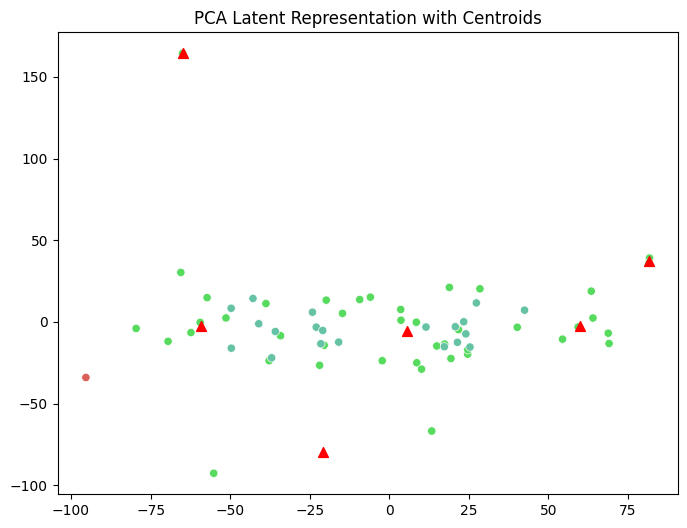

In [27]:
journal_id = '2598795X'

kmeans, threshold, X, df_res, pca, df_res_inject, pca_data_inject = load_data(journal_id, journal_type)
# journal = list(df_res.journal.apply(lambda x : 1 if x == '25277456' else 0))
scoop_labels = list(df_res.scoop_labels)
lang = list(df_res.lang)
# journal = list(df_res.journal)

# plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='True', label = df_res.kmeans_labels, lang = lang, new_data_pca=pca_data_inject)

# plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus', label = df_res.kmeans_labels, lang = lang)
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus', label = df_res.kmeans_labels, lang = lang, new_data_pca=pca_data_inject, scoop_labels_inject=df_res_inject.scoop_labels)

df_res[df_res.scoop_labels == -1][['DOI', 'data_cleaned']].head(2).to_clipboard()


In [25]:
df_res_inject

,Unnamed: 0,eissn,DOI,title,abstract,published_date,year,data_cleaned,lang,label,kmeans_labels,scoop_labels
0,237244,2598795X,10.22437/jlj.5.1.1-38,arrangement of submarine cables and pipelines ...,"<jats:p>As a country with many islands, Indone...",2022-05-31,2022.0,arrangement of submarine cables and pipelines ...,en,0,0,1.0
1,237245,2598795X,10.22437/jlj.5.1.39-65,reviewing regulations on rights of persons wit...,<jats:p>Viet Nam signed the International Conv...,2022-05-31,2022.0,reviewing regulations on rights of persons wit...,en,0,1,1.0
2,237246,2598795X,10.22437/jlj.6.1.23-45,the role of environmental principles in mining...,<jats:p>Human life is inherently intertwined w...,2023-05-29,2023.0,the role of environmental principles in mining...,en,0,0,1.0
3,237247,2598795X,10.22437/jlj.6.1.1-22,icj jurisdiction over the case of policy to st...,<jats:p>The purpose of this paper is to explor...,2023-05-29,2023.0,icj jurisdiction over the case of policy to st...,en,0,1,1.0
4,237248,2598795X,10.22437/jlj.6.2.125-141,local wisdom in indonesia: assessing its legal...,<jats:p>This study delves into an examination ...,2023-11-30,2023.0,local wisdom in indonesia: assessing its legal...,en,0,3,1.0
5,237249,2598795X,10.22437/jlj.6.2.103-124,the right to water: a comparative study of law...,"<jats:p>Water is essential for human life, so ...",2023-11-30,2023.0,the right to water: a comparative study of law...,en,0,1,1.0
6,237250,2598795X,10.22437/jlj.5.1.123-146,protection standardization towards unemploymen...,<jats:p>The Covid-19 pandemic triggered a sign...,2023-12-03,2023.0,protection standardization towards unemploymen...,en,0,0,1.0
7,237251,2598795X,10.22437/jlj.5.2.251-270,meaningful participation in legislative drafti...,<jats:p>Public participation has a significant...,2023-12-03,2023.0,meaningful participation in legislative drafti...,en,0,1,1.0
8,237252,2598795X,10.22437/jlj.5.2.207-227,the government use and compulsory license: que...,<jats:p>The pandemic of Covid-19 and the urgen...,2023-12-03,2023.0,the government use and compulsory license: que...,en,0,1,1.0
9,237253,2598795X,10.22437/jlj.5.1.67-79,remission for terrorist convicts: challenges a...,<jats:p>This article aims at discussing remiss...,2023-12-03,2023.0,remission for terrorist convicts: challenges a...,en,0,1,1.0


In [10]:
from keybert import KeyBERT

jurnal_ids = os.listdir(os.path.join('src', journal_type))

for jurnal_id in jurnal_ids:

    kmeans, threshold, X, df_res = load_data(jurnal_id, journal_type)

    keyphrase = {}

    kw_model = KeyBERT()

    for k in range(len(kmeans.cluster_centers_)):
        doc = ' '.join(list(df_res[df_res.kmeans_labels == k].data_cleaned))
        keywords = kw_model.extract_keywords(doc)

        keyphrase[k] = keywords

    output = {
        'cluster' : [],
        'key' : []
    }

    for i, j in keyphrase.items():
        output['cluster'].append(i)
        output['key'].append(j)

    filepath = os.path.join('src', journal_type, jurnal_id)
    output = pd.DataFrame(output)
    output.to_csv(f'{filepath}/keyphrase_sinta1_3_1.csv')

    print(jurnal_id, 'success')

print(jurnal_id)
# plot_vector_distribution(X, kmeans, df_res.Label, check_outscoop='focus')

1907770x success
19782993 success
1979570X success
20854722 success
20864094 success
20875886 success
20878575 success
20886985 success
20888694 success
20888708 success
20892063 success
20894392 success
22249028 success
22524940 success
2252696X success
22528083 success
22528938 success
23029277 success
23029285 success
23378824 success
23381353 success
2338476X success
23385499 success
23385502 success
23385510 success
2338557X success
23387238 success
23387610 success
23389486 success
23548509 success
23549114 success
23549203 success
23553596 success
23556145 success
23556544 success
23559179 success
23559306 success
23561424 success
23562641 success
23563656 success
23564512 success
23564644 success
23565322 success
24067598 success
24068195 success
2406825x success
24068799 success
24069272 success
24070610 success
24072230 success
24075825 success
24076899 success
24077542 success
24078646 success
2442-8620 success
24423084 success
2442871X success
24429325 success
24429740 succ

In [12]:
jurnal_ids = '25024760'

kmeans, threshold, X, df_res = load_data(jurnal_id, journal_type)
keyphrase = pd.read_csv(os.path.join('src', journal_type, jurnal_id, 'keyphrase_sinta1_3_1.csv'))
keyphrase[['cluster', 'key']]

,cluster,key
0,0,"[('mosquito', 0.4243), ('insecticide', 0.4009)..."
1,1,"[('drying', 0.34), ('dryer', 0.3397), ('clothe..."
2,2,"[('mosquito', 0.3295), ('biomass', 0.3279), ('..."
3,3,"[('electrolytes', 0.4285), ('electrolyte', 0.4..."
4,4,"[('hz', 0.3492), ('filter', 0.3253), ('frequen..."
5,5,"[('chiller', 0.3861), ('teaching', 0.3608), ('..."
